In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
from collections import Counter
import networkx as nx

In [3]:
hurricane_harvey_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_harvey_df.csv')
hurricane_irma_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_irma_df.csv')
earthquake_mexico_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_mexico_df.csv')
hurricane_maria_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_maria_df.csv')
earthquake_costarica_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_costarica_df.csv')
earthquake_iran_iraq_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_iran_iraq_df.csv')
mudslide_california_df = pd.read_csv('/home/cquirk/EventCSVs/mudslide_california_df.csv')
windstorm_friederike_df = pd.read_csv('/home/cquirk/EventCSVs/windstorm_friederike_df.csv')
wildfire_nairobi_df = pd.read_csv('/home/cquirk/EventCSVs/wildfire_nairobi_df.csv')

riot_hamburg_G20_df = pd.read_csv('/home/cquirk/EventCSVs/riot_hamburg_G20_df.csv')
riot_charlottesville_df = pd.read_csv('/home/cquirk/EventCSVs/riot_charlottesville_df.csv')
riot_catalonia_df = pd.read_csv('/home/cquirk/EventCSVs/riot_catalonia_df.csv')
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

school_shooting_tehama_county_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_tehama_county_df.csv')
shooting_trebes_france_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_trebes_france_df.csv')
shooting_youtube_HQ_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_youtube_HQ_df.csv')
van_attack_muenster_df = pd.read_csv('/home/cquirk/EventCSVs/van_attack_muenster_df.csv')
school_shooting_santa_fe_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_santa_fe_df.csv')

In [4]:
df_dates = Counter(school_shooting_tehama_county_df['Timestamp'])
df_dates = list(df_dates.keys())
df_dates = sorted(df_dates)

In [6]:
df_freq = pd.DataFrame()
df_freq['Date'] = riot_philadelphia_superbowl_df['Timestamp'].unique()
df_freq['Date'] = pd.to_datetime(df_freq['Date'])
df_freq = df_freq.sort_values(by='Date')
df_dates = Counter(riot_philadelphia_superbowl_df['Timestamp'])
df_dates = list(df_dates.keys())
df_dates = sorted(df_dates)

n = len(df_dates)

df_freq['003'] = [0]*n
df_freq['012'] = [0]*n
df_freq['102'] = [0]*n
df_freq['021D'] = [0]*n
df_freq['021U'] = [0]*n
df_freq['021C'] = [0]*n
df_freq['111D'] = [0]*n
df_freq['111U'] = [0]*n
df_freq['030T'] = [0]*n
df_freq['030C'] = [0]*n
df_freq['201'] = [0]*n
df_freq['120D'] = [0]*n
df_freq['120U'] = [0]*n
df_freq['120C'] = [0]*n
df_freq['210'] = [0]*n
df_freq['300'] = [0]*n

In [7]:
#rewrite zeros with appropriate counts
i = 0

day_spec_df = pd.DataFrame() 

for date in df_dates:
   
    day_spec_df = day_spec_df.append(riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == date])   

    G = nx.from_pandas_edgelist(day_spec_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    
    triads = nx.triadic_census(G)
    
    df_freq.iloc[i, 1] = triads['003']
    df_freq.iloc[i, 2] = triads['012']
    df_freq.iloc[i, 3] = triads['102']
    df_freq.iloc[i, 4] = triads['021D']
    df_freq.iloc[i, 5] = triads['021U']
    df_freq.iloc[i, 6] = triads['021C']
    df_freq.iloc[i, 7] = triads['111D']
    df_freq.iloc[i, 8] = triads['111U']
    df_freq.iloc[i, 9] = triads['030T']
    df_freq.iloc[i, 10] = triads['030C']
    df_freq.iloc[i, 11] = triads['201']
    df_freq.iloc[i, 12] = triads['120D']
    df_freq.iloc[i, 13] = triads['120U']
    df_freq.iloc[i, 14] = triads['120C']
    df_freq.iloc[i, 15] = triads['201']
    df_freq.iloc[i, 16] = triads['300']

    i = i+1 

df_freq

,Date,003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
0,2018-02-04,10,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-02-05,150456810,712062,1931,549,1642,41,2,1,6,0,0,0,0,0,0,0
2,2018-02-06,199321468,866255,2121,619,2144,44,2,1,10,0,0,0,0,0,0,0
4,2018-02-07,219094516,923381,2189,639,2314,44,2,1,10,0,0,0,0,0,0,0
5,2018-02-08,238222878,979632,2251,653,2532,45,2,1,10,0,0,0,0,0,0,0
3,2018-02-09,258433555,1037595,2313,749,2650,45,2,1,10,0,0,0,0,0,0,0
6,2018-02-10,261122308,1044667,2321,755,2655,45,2,1,10,0,0,0,0,0,0,0


In [8]:
#as percent of total triads - where at least 2 edges are present (so ignore first 2 columns)

df_freq_norm = df_freq.copy()
df_freq_norm = df_freq_norm.drop(['003', '012'], axis=1)

df_freq_norm['SUM'] = df_freq_norm.sum(axis=1, numeric_only=True)
df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']] = df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']].div(df_freq_norm['SUM'], axis=0)
df_freq_norm 

,Date,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300,SUM
0,2018-02-04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2018-02-05,0.462848,0.131592,0.393576,0.009827,0.000479,0.000240,0.001438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4172
2,2018-02-06,0.429265,0.125278,0.433920,0.008905,0.000405,0.000202,0.002024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4941
4,2018-02-07,0.421043,0.122908,0.445086,0.008463,0.000385,0.000192,0.001923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5199
5,2018-02-08,0.409720,0.118857,0.460866,0.008191,0.000364,0.000182,0.001820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5494
3,2018-02-09,0.400867,0.129809,0.459272,0.007799,0.000347,0.000173,0.001733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5770
6,2018-02-10,0.400933,0.130420,0.458628,0.007773,0.000345,0.000173,0.001727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5789


Text(0.5, 0.98, 'Philadelphia Superbowl Triad Census (for at least 2 edges)')

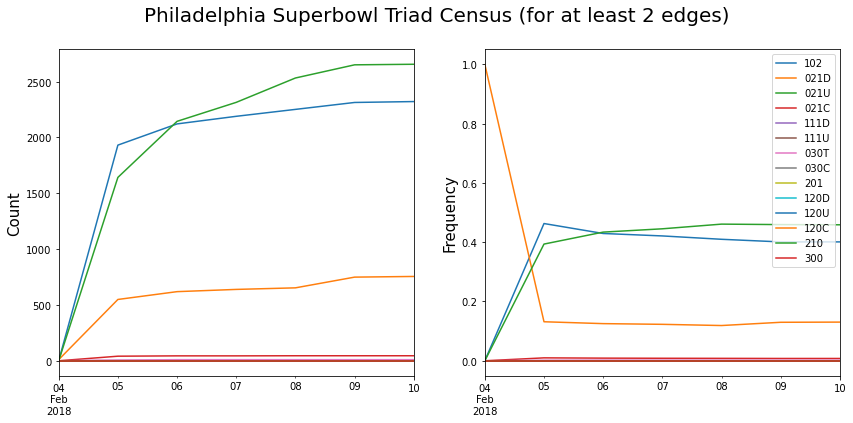

In [9]:
fig, axs = plt.subplots(1,2, figsize=[14,6]) 

#count
df_freq.plot( x = 'Date' , y = '102', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '021D', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '021U', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '021C', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '111D', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '111U', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '030T', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '030C', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '201', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '120D', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '120U', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '120C', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '210', ax = axs[0]) 
df_freq.plot( x = 'Date' , y = '300', ax = axs[0]) 

axs[0].get_legend().remove()

#freq
df_freq_norm.plot( x = 'Date' , y = '102', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '021D', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '021U', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '021C', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '111D', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '111U', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '030T', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '030C', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '201', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '120D', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '120U', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '120C', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '210', ax = axs[1]) 
df_freq_norm.plot( x = 'Date' , y = '300', ax = axs[1]) 

for ax in axs:
    ax.set_xlabel('')
axs[0].set_ylabel('Count', fontsize = 15)
axs[1].set_ylabel('Frequency', fontsize = 15)
fig.suptitle('Philadelphia Superbowl Triad Census (for at least 2 edges)', fontsize = 20)

In [10]:
def generate_triad_graph(input_df, title):
   
    #create df
    df_freq = pd.DataFrame()

    #sort dates
    df_freq['Date'] = input_df['Timestamp'].unique()
    df_freq['Date'] = pd.to_datetime(df_freq['Date'])
    df_freq = df_freq.sort_values(by='Date')
    
    #get dates as list
    df_dates = Counter(input_df['Timestamp'])
    df_dates = list(df_dates.keys())
    df_dates = sorted(df_dates)
    n = len(df_dates)

    #initialize columns
    df_freq['003'] = [0]*n
    df_freq['012'] = [0]*n
    df_freq['102'] = [0]*n
    df_freq['021D'] = [0]*n
    df_freq['021U'] = [0]*n
    df_freq['021C'] = [0]*n
    df_freq['111D'] = [0]*n
    df_freq['111U'] = [0]*n
    df_freq['030T'] = [0]*n
    df_freq['030C'] = [0]*n
    df_freq['201'] = [0]*n
    df_freq['120D'] = [0]*n
    df_freq['120U'] = [0]*n
    df_freq['120C'] = [0]*n
    df_freq['210'] = [0]*n
    df_freq['300'] = [0]*n

    #rewrite zeros with appropriate counts
    i = 0

    day_spec_df = pd.DataFrame() 

    for date in df_dates:
   
        day_spec_df = day_spec_df.append(input_df.loc[input_df['Timestamp'] == date])   

        G = nx.from_pandas_edgelist(day_spec_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    
        triads = nx.triadic_census(G)
    
        df_freq.iloc[i, 1] = triads['003']
        df_freq.iloc[i, 2] = triads['012']
        df_freq.iloc[i, 3] = triads['102']
        df_freq.iloc[i, 4] = triads['021D']
        df_freq.iloc[i, 5] = triads['021U']
        df_freq.iloc[i, 6] = triads['021C']
        df_freq.iloc[i, 7] = triads['111D']
        df_freq.iloc[i, 8] = triads['111U']
        df_freq.iloc[i, 9] = triads['030T']
        df_freq.iloc[i, 10] = triads['030C']
        df_freq.iloc[i, 11] = triads['201']
        df_freq.iloc[i, 12] = triads['120D']
        df_freq.iloc[i, 13] = triads['120U']
        df_freq.iloc[i, 14] = triads['120C']
        df_freq.iloc[i, 15] = triads['201']
        df_freq.iloc[i, 16] = triads['300']

        i = i+1 
    
    #as percent of total triads - where at least 2 edges are present (so ignore first 2 columns)

    df_freq_norm = df_freq.copy()
    df_freq_norm = df_freq_norm.drop(['003', '012'], axis=1)

    df_freq_norm['SUM'] = df_freq_norm.sum(axis=1, numeric_only=True)
    df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']] = df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']].div(df_freq_norm['SUM'], axis=0)

    #plot counts + freqs
    fig, axs = plt.subplots(1,2, figsize=[14,6]) 

    #count
    df_freq.plot( x = 'Date' , y = '102', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '111D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '111U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '030T', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '030C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '201', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '210', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '300', ax = axs[0]) 

    axs[0].get_legend().remove()

    #freq
    df_freq_norm.plot( x = 'Date' , y = '102', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '111D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '111U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '030T', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '030C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '201', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '210', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '300', ax = axs[1]) 

    for ax in axs:
        ax.set_xlabel('')
    axs[0].set_ylabel('Count', fontsize = 15)
    axs[1].set_ylabel('Frequency', fontsize = 15)
    fig.suptitle(title, fontsize = 20)
    #'Philadelphia Superbowl Triad Census (for at least 2 edges)'
    
    plt.savefig(title + '.png')
    df_freq.to_csv(title + 'freq_data.csv')

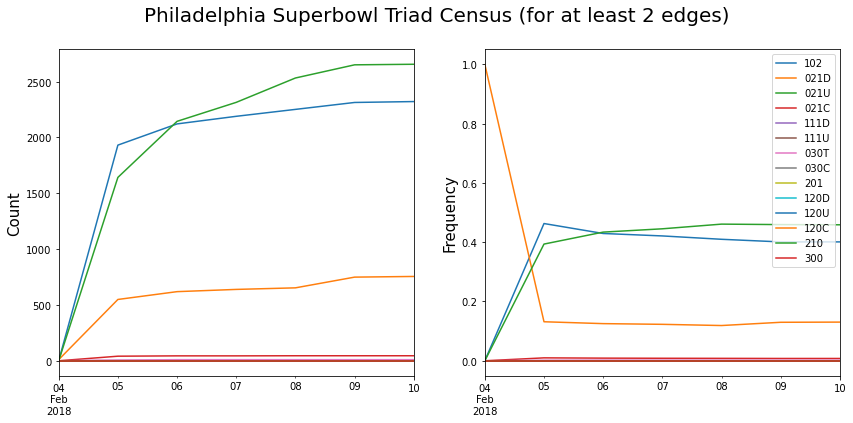

In [11]:
generate_triad_graph(riot_philadelphia_superbowl_df, 'Philadelphia Superbowl Triad Census (for at least 2 edges)')

In [30]:
def high_low_triads(input_df, title):
    df_high = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Surprise')]
    df_low = input_df.loc[(input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Disgust') | (input_df['Emotion'] == 'neutral')]
    title_high = 'High Arousal ' + title 
    title_low = 'Low Arousal ' + title
    generate_triad_graph(df_high, title_high) 
    generate_triad_graph(df_low, title_low)

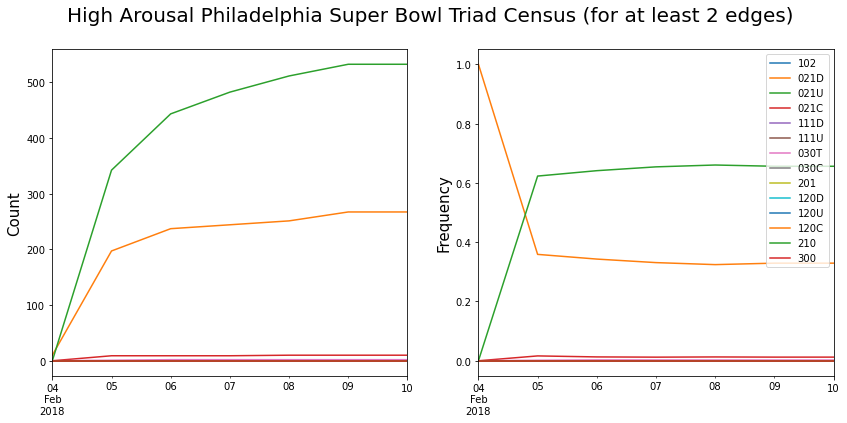

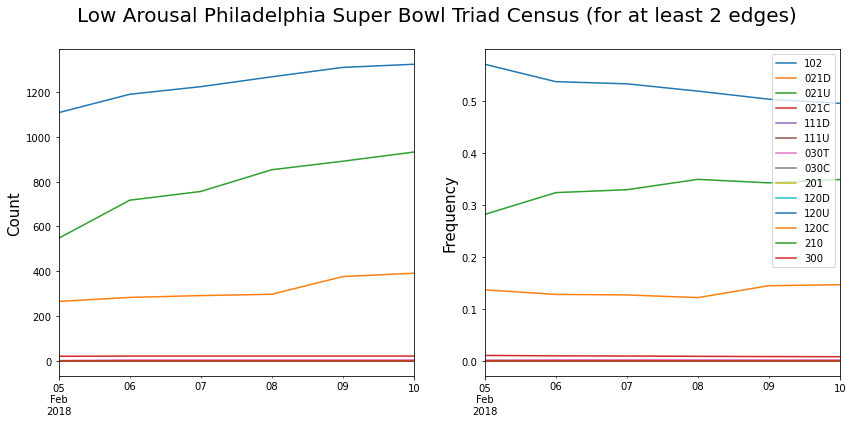

In [31]:
high_low_triads(riot_philadelphia_superbowl_df, 'Philadelphia Super Bowl Triad Census (for at least 2 edges)')

In [14]:
#get low arousal and high arousal emotion dataframes:
riot_philadelphia_superbowl_high = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Anger') | (riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation') | (riot_philadelphia_superbowl_df['Emotion'] == 'Fear') | (riot_philadelphia_superbowl_df['Emotion'] == 'Surprise')]
riot_philadelphia_superbowl_low = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Sadness') | (riot_philadelphia_superbowl_df['Emotion'] == 'Trust') | (riot_philadelphia_superbowl_df['Emotion'] == 'Joy') | (riot_philadelphia_superbowl_df['Emotion'] == 'Disgust') | (riot_philadelphia_superbowl_df['Emotion'] == 'neutral')]


In [19]:
G_sup_high = nx.from_pandas_edgelist(riot_philadelphia_superbowl_high, source = 'Source', target = 'Target', edge_attr = ['Emotion'], create_using=nx.MultiGraph())
G_sup_low = nx.from_pandas_edgelist(riot_philadelphia_superbowl_low, source = 'Source', target = 'Target', edge_attr = ['Emotion'], create_using=nx.MultiGraph())

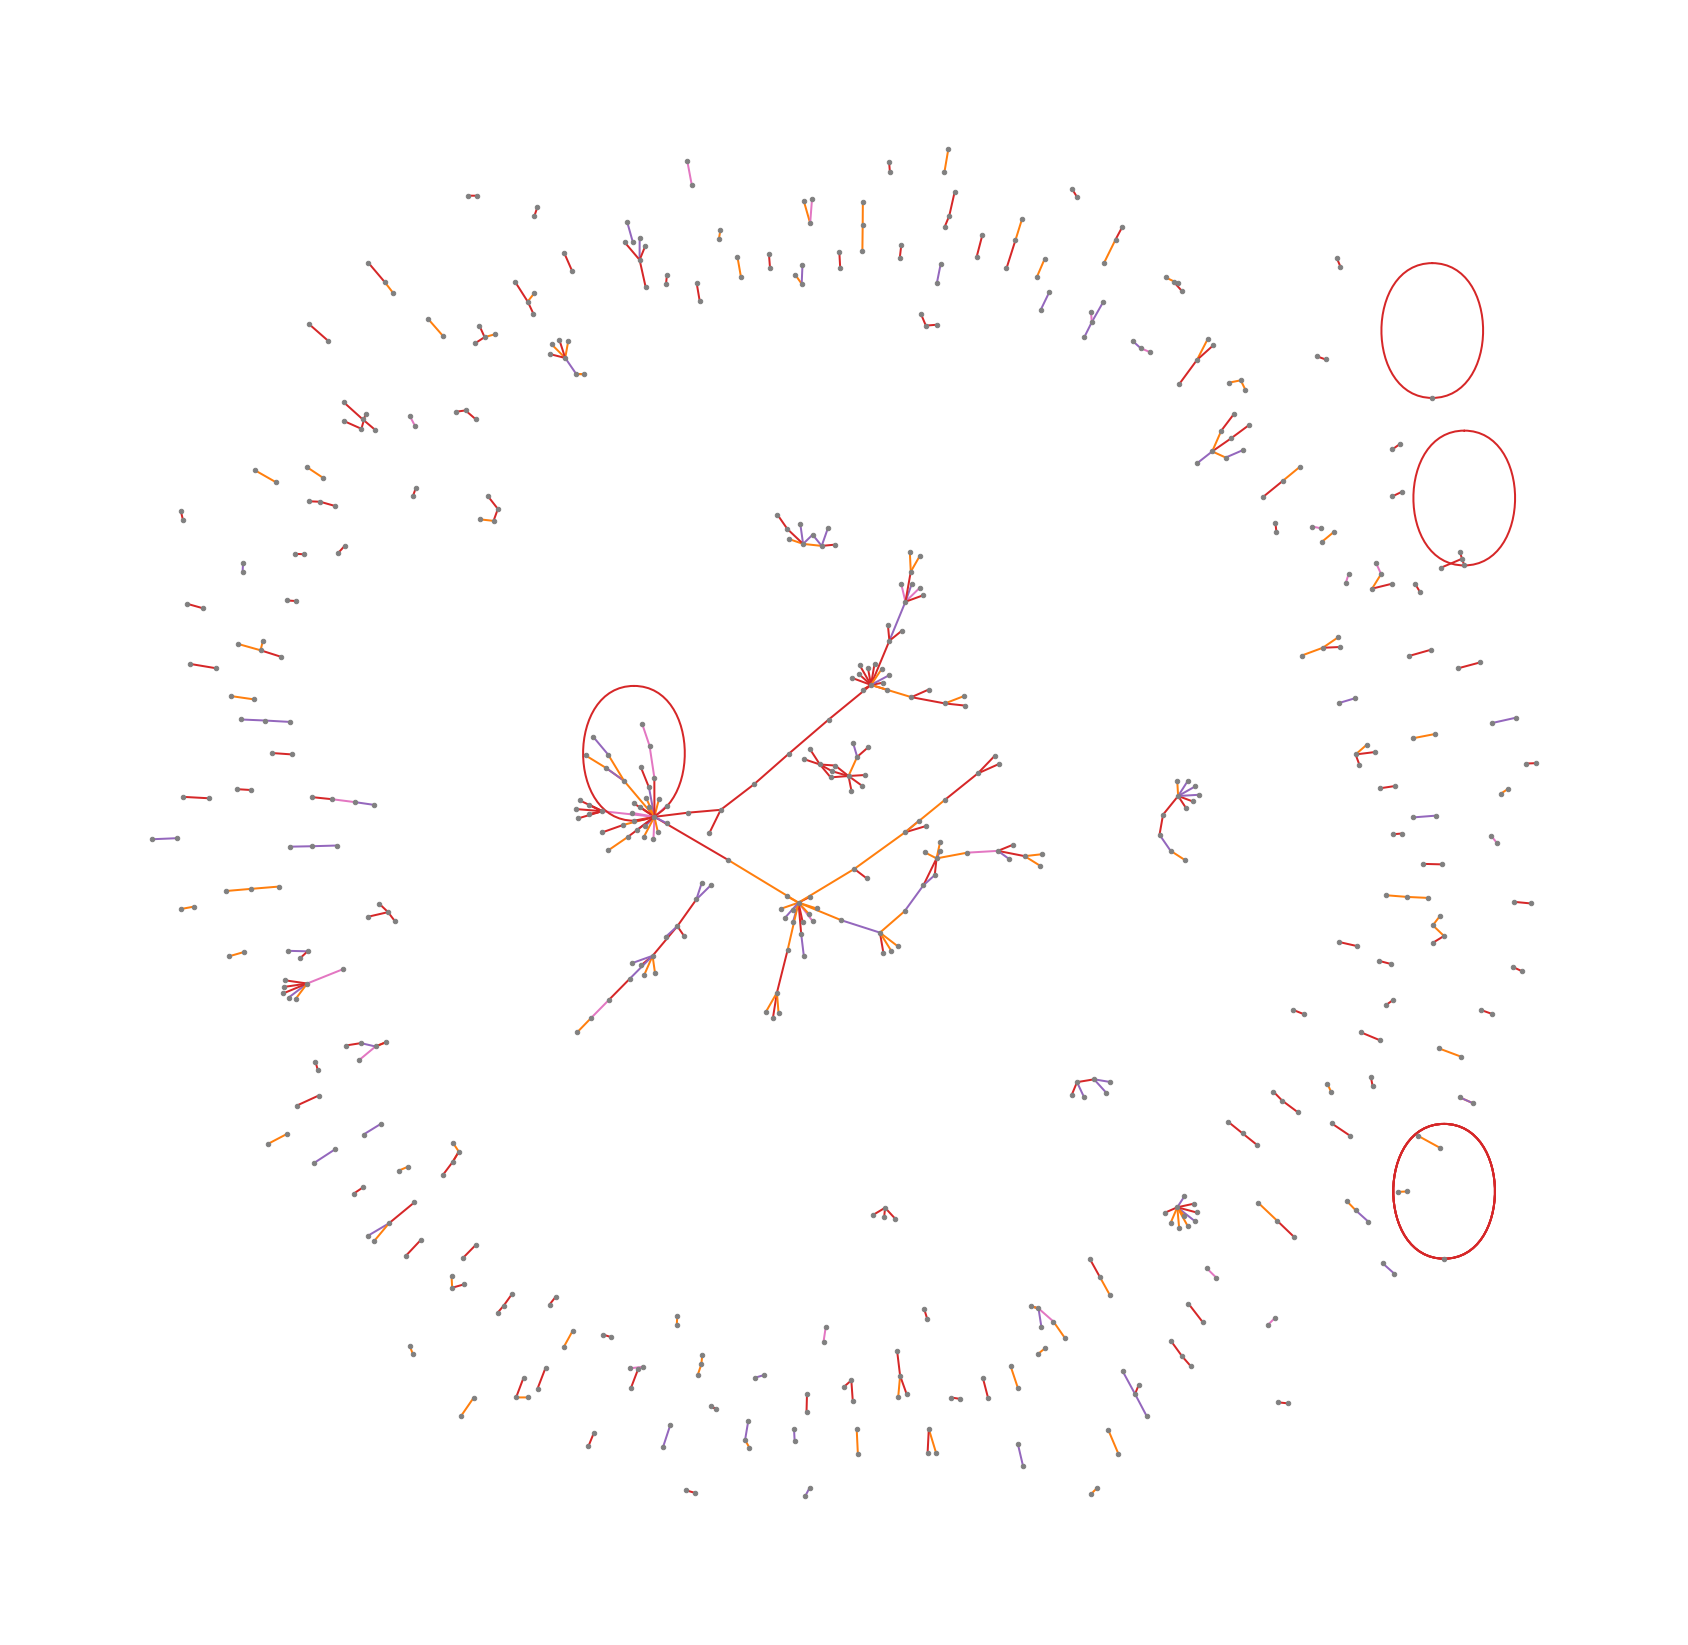

In [24]:
fig, ax = plt.subplots(figsize=(30,30))

pos = nx.spring_layout(G_sup_high, seed=7)
nx.draw(G_sup_high, pos, edge_color=riot_philadelphia_superbowl_high['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

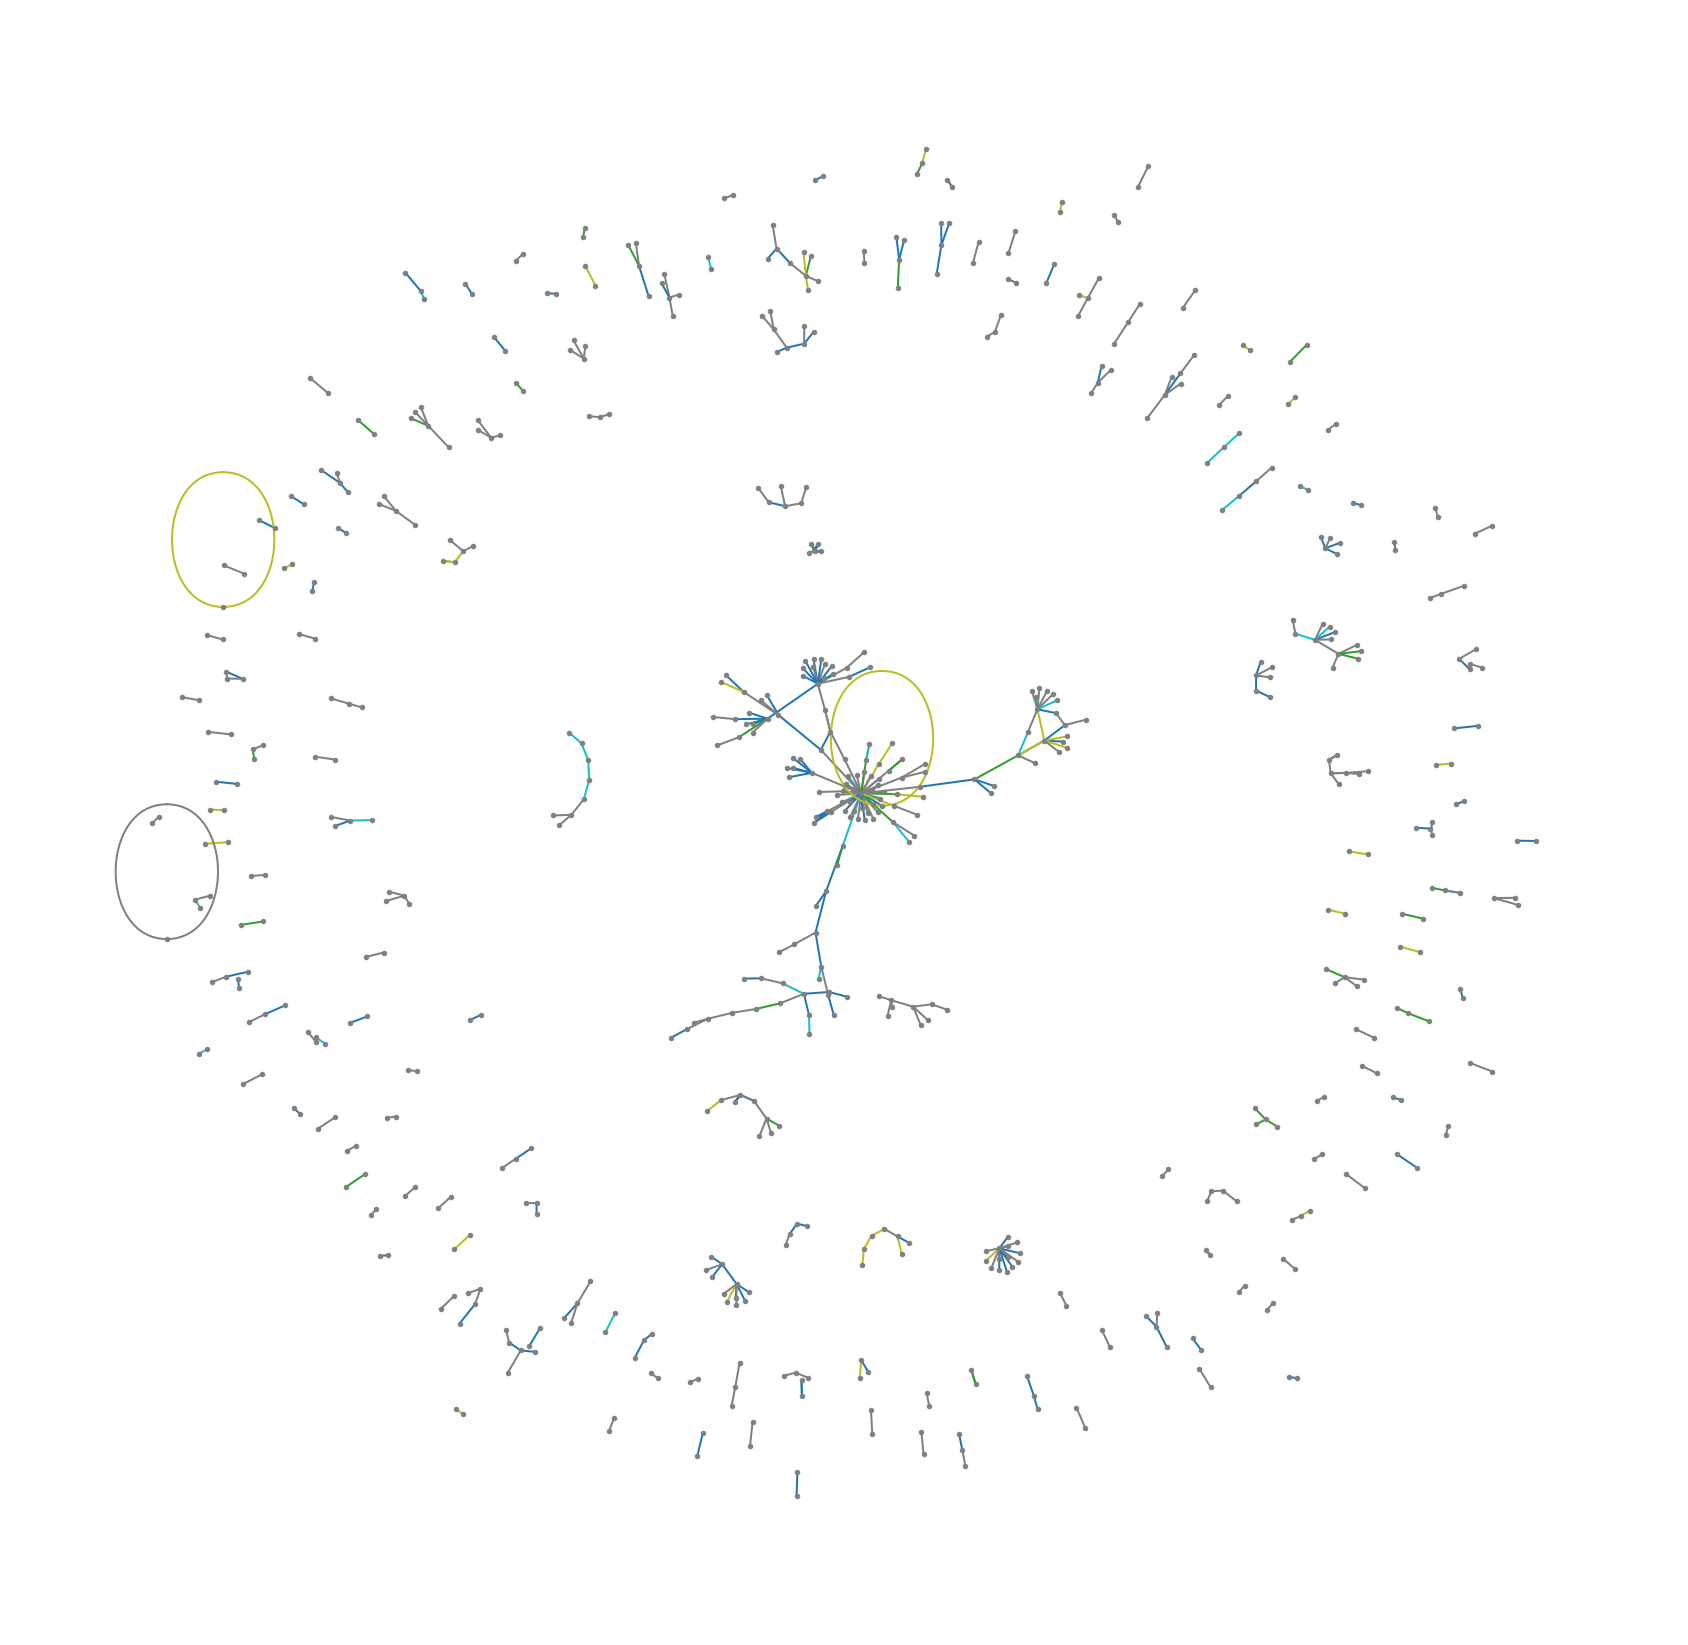

In [25]:
fig, ax = plt.subplots(figsize=(30,30))

pos = nx.spring_layout(G_sup_low, seed=7)
nx.draw(G_sup_low, pos, edge_color=riot_philadelphia_superbowl_low['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

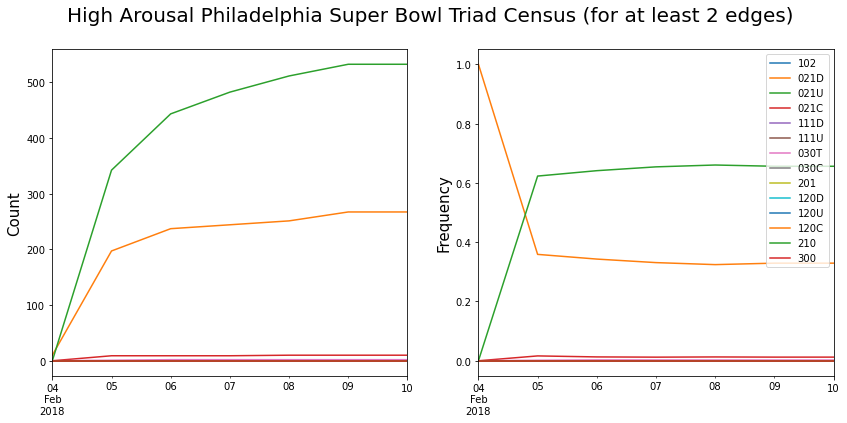

In [28]:
generate_triad_graph(riot_philadelphia_superbowl_high, 'High Arousal Philadelphia Super Bowl Triad Census (for at least 2 edges)')

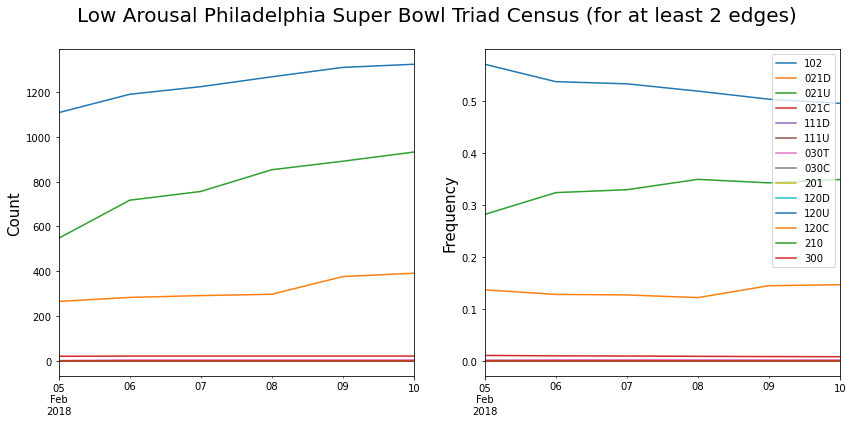

In [29]:
generate_triad_graph(riot_philadelphia_superbowl_low, 'Low Arousal Philadelphia Super Bowl Triad Census (for at least 2 edges)')

# Natural Disasters

In [ ]:
#generate_triad_graph(hurricane_harvey_df, 'Hurricane Harvey Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(hurricane_irma_df, 'Hurricane Irma Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(earthquake_mexico_df, 'Mexico Earthquake Triad Census (for at least 2 edges)')

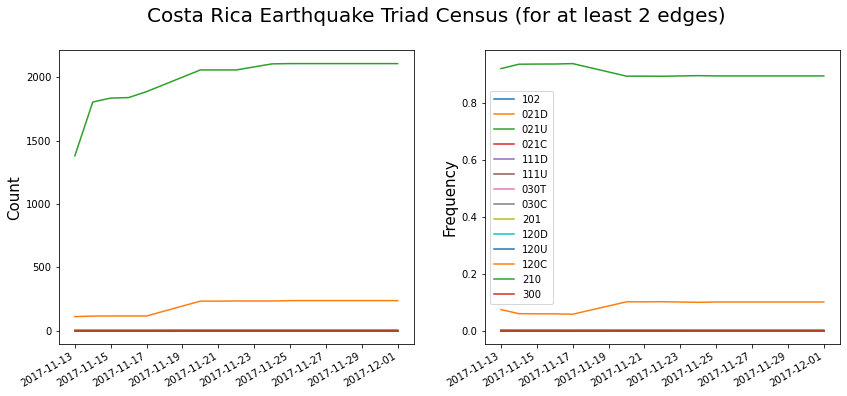

In [28]:
generate_triad_graph(earthquake_costarica_df, 'Costa Rica Earthquake Triad Census (for at least 2 edges)')

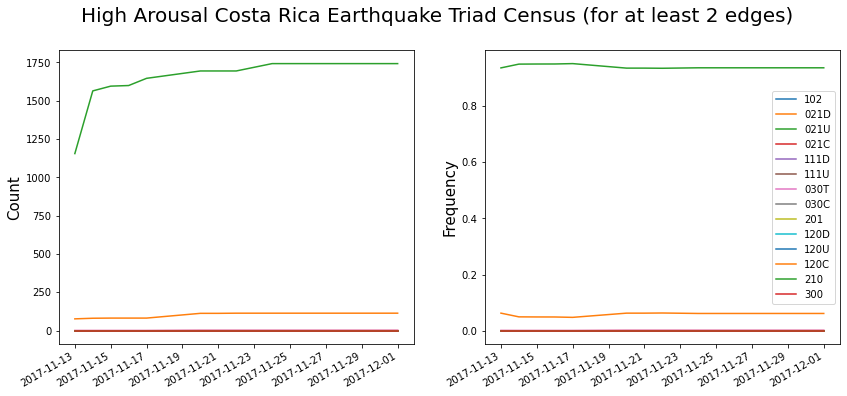

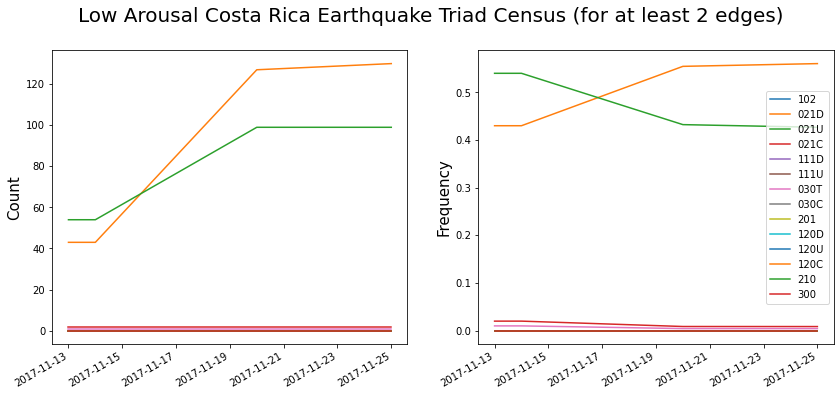

In [32]:
high_low_triads(earthquake_costarica_df, 'Costa Rica Earthquake Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(earthquake_iran_iraq_df, 'Iran/Iraq Earthquake Triad Census (for at least 2 edges)')

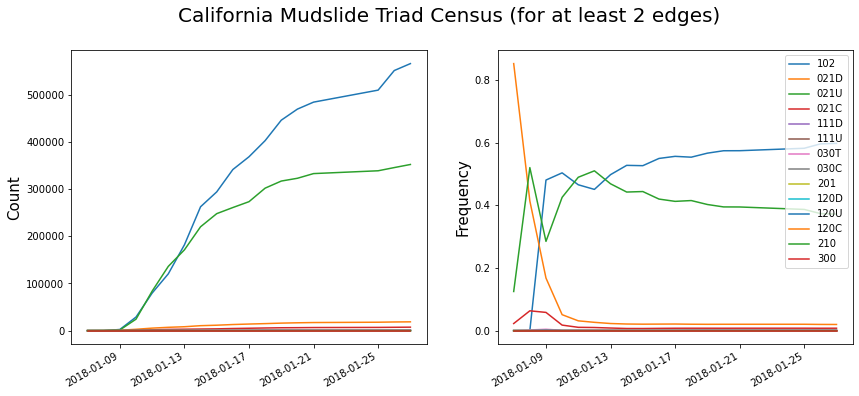

In [30]:
generate_triad_graph(mudslide_california_df, 'California Mudslide Triad Census (for at least 2 edges)')

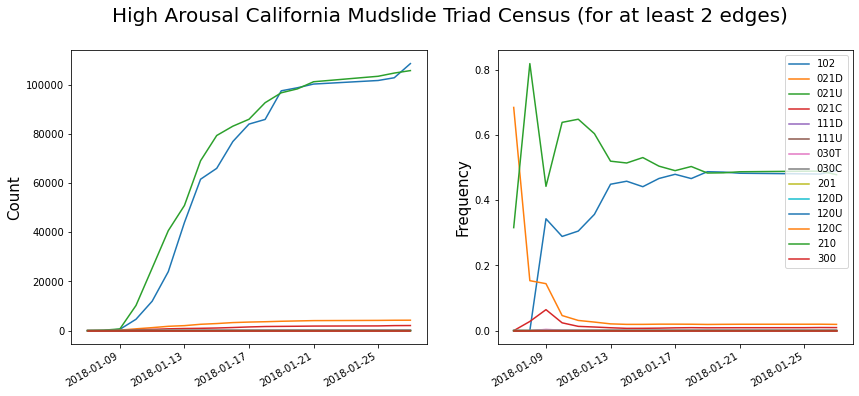

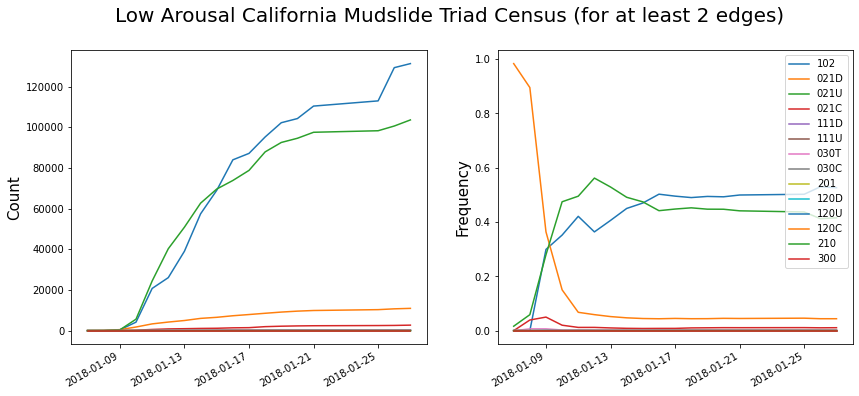

In [33]:
high_low_triads(mudslide_california_df, 'California Mudslide Triad Census (for at least 2 edges)')

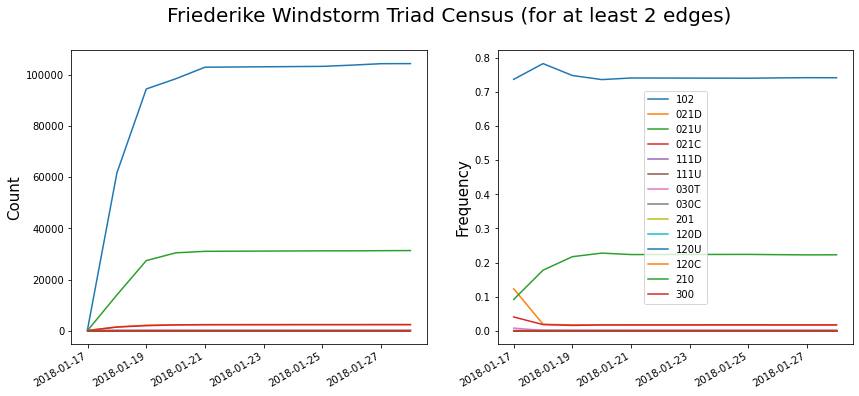

In [31]:
generate_triad_graph(windstorm_friederike_df, 'Friederike Windstorm Triad Census (for at least 2 edges)')

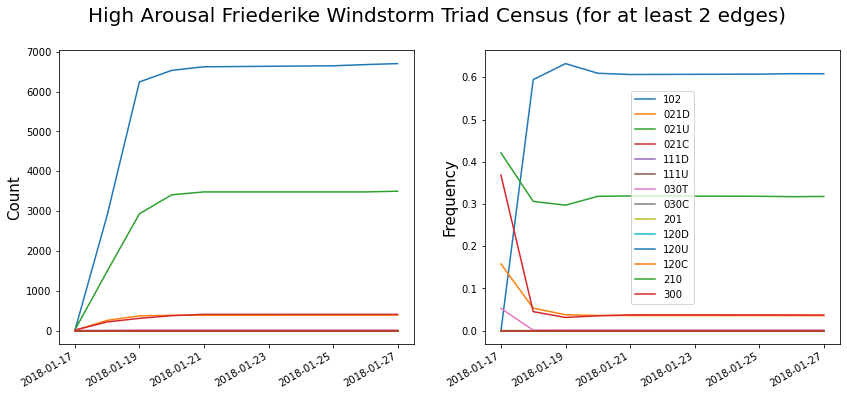

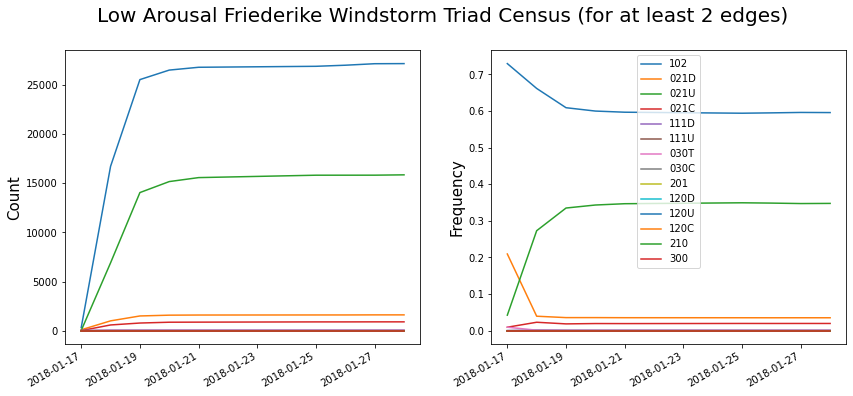

In [34]:
high_low_triads(windstorm_friederike_df, 'Friederike Windstorm Triad Census (for at least 2 edges)')

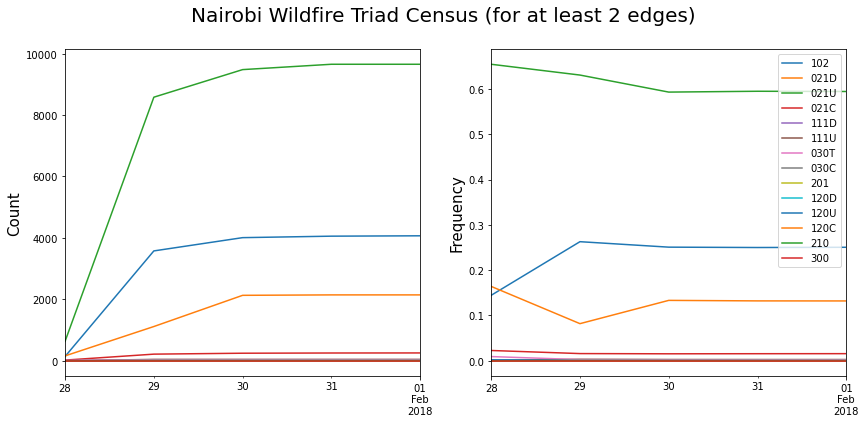

In [32]:
generate_triad_graph(wildfire_nairobi_df, 'Nairobi Wildfire Triad Census (for at least 2 edges)')

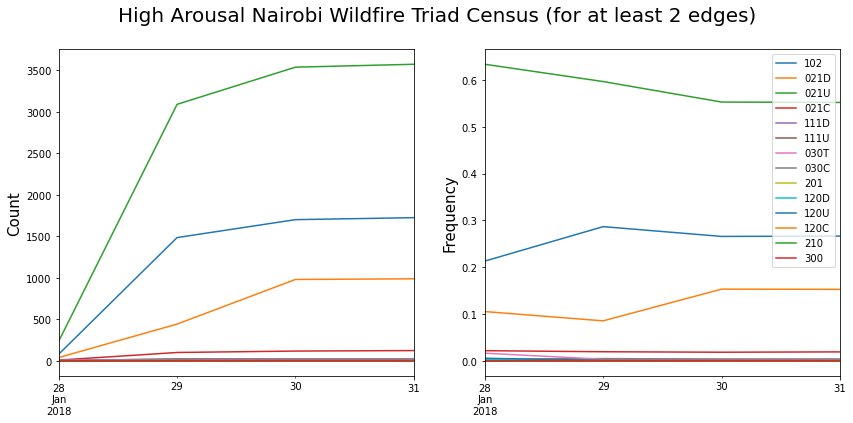

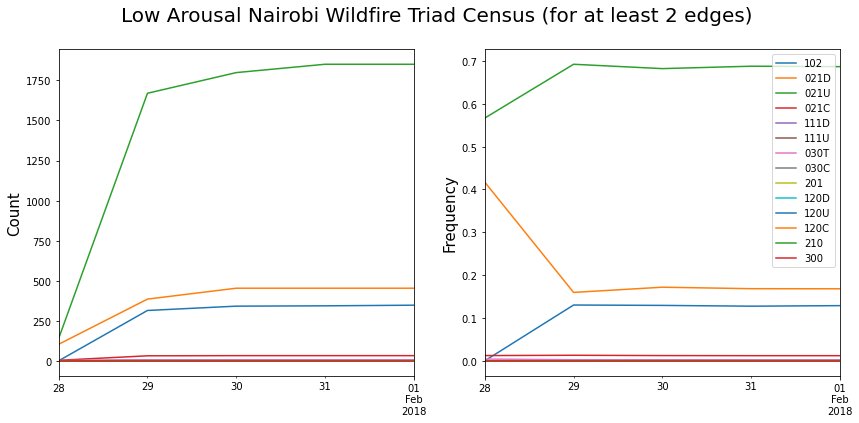

In [35]:
high_low_triads(wildfire_nairobi_df, 'Nairobi Wildfire Triad Census (for at least 2 edges)')

# Riots

In [ ]:
#generate_triad_graph(riot_hamburg_G20_df, 'Hamburg G20 Riot Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(riot_charlottesville_df, 'Charlottesville Riot Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(riot_catalonia_df, 'Catalonia Riot Triad Census (for at least 2 edges)')

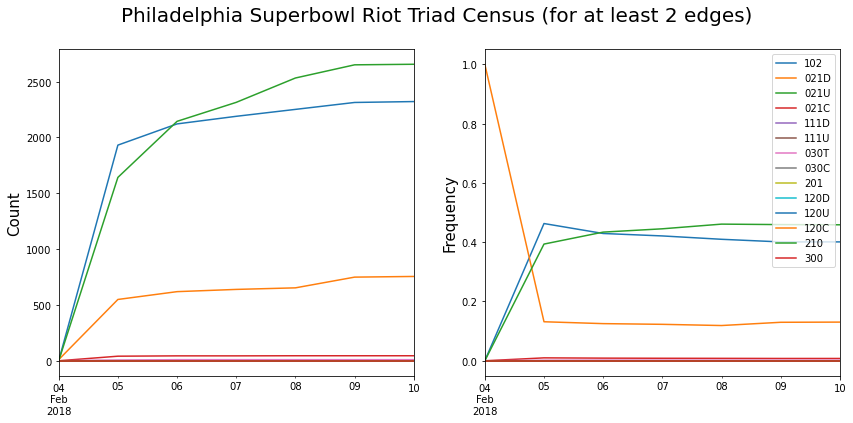

In [37]:
generate_triad_graph(riot_philadelphia_superbowl_df, 'Philadelphia Superbowl Riot Triad Census (for at least 2 edges)')

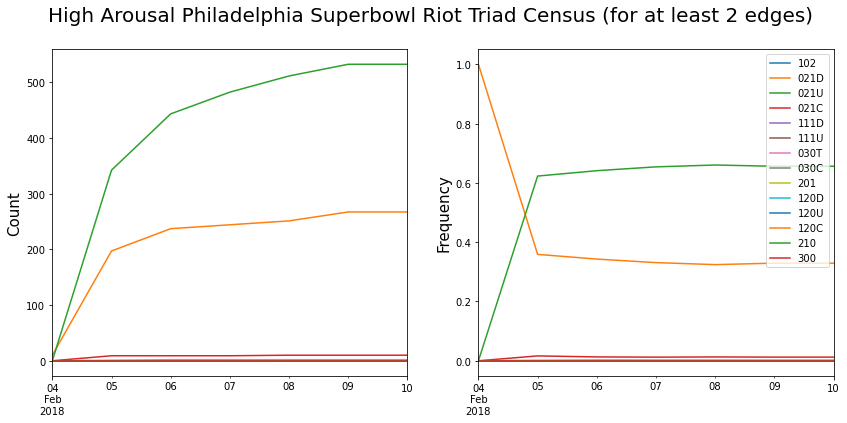

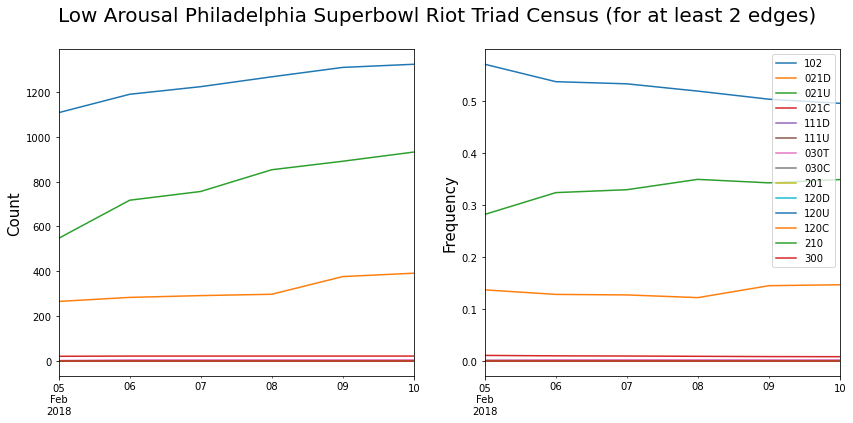

In [36]:
high_low_triads(riot_philadelphia_superbowl_df, 'Philadelphia Superbowl Riot Triad Census (for at least 2 edges)')

# Terror Attacks

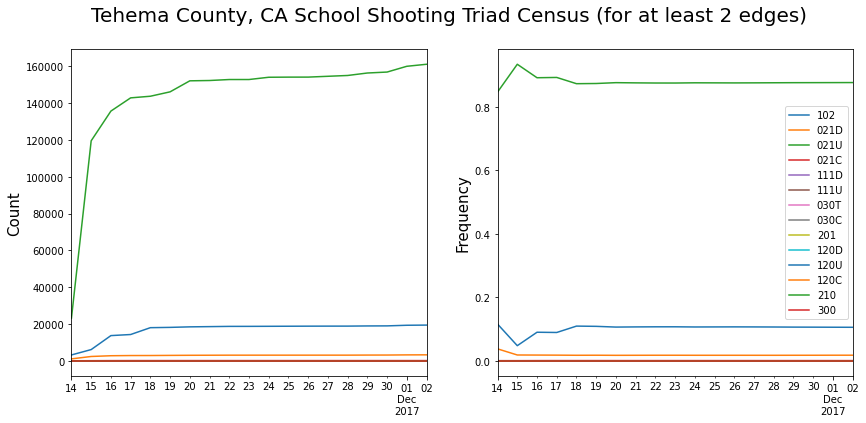

In [34]:
generate_triad_graph(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting Triad Census (for at least 2 edges)')

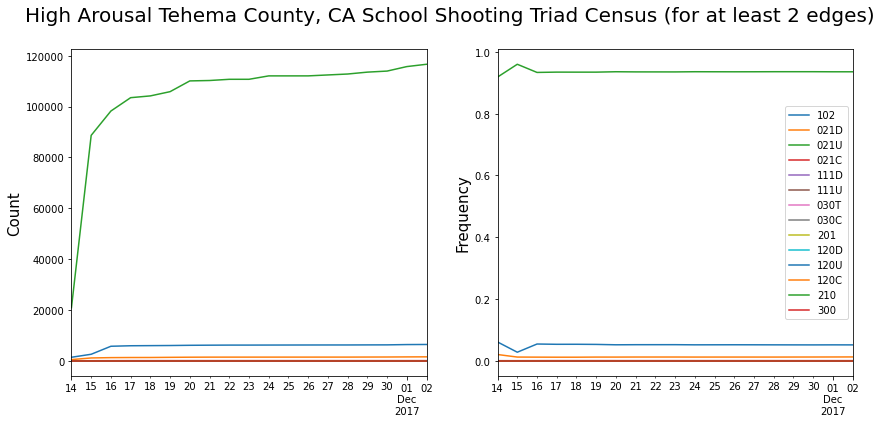

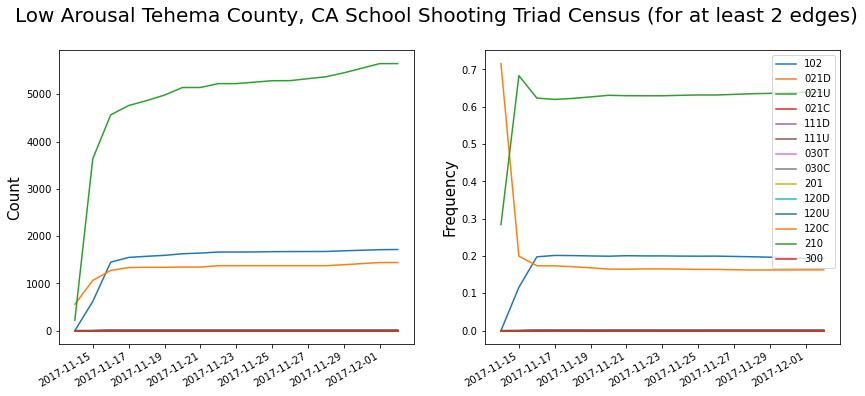

In [38]:
high_low_triads(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting Triad Census (for at least 2 edges)')

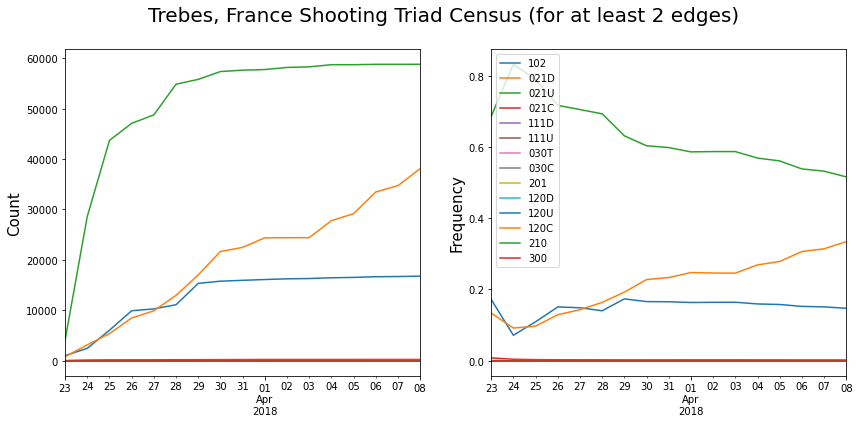

In [35]:
generate_triad_graph(shooting_trebes_france_df, 'Trebes, France Shooting Triad Census (for at least 2 edges)')

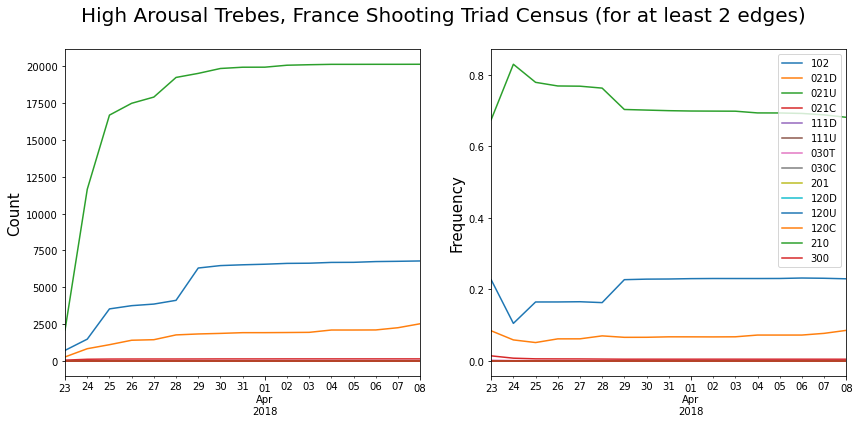

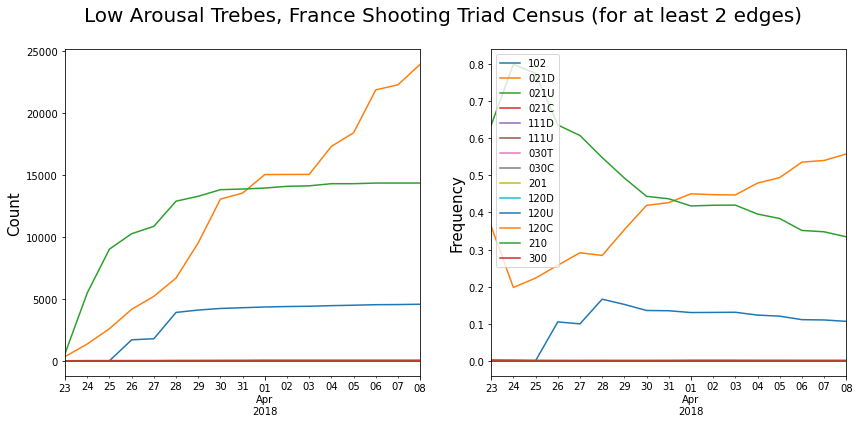

In [39]:
high_low_triads(shooting_trebes_france_df, 'Trebes, France Shooting Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(shooting_youtube_HQ_df, 'YouTube HQ Shooting Triad Census (for at least 2 edges)')

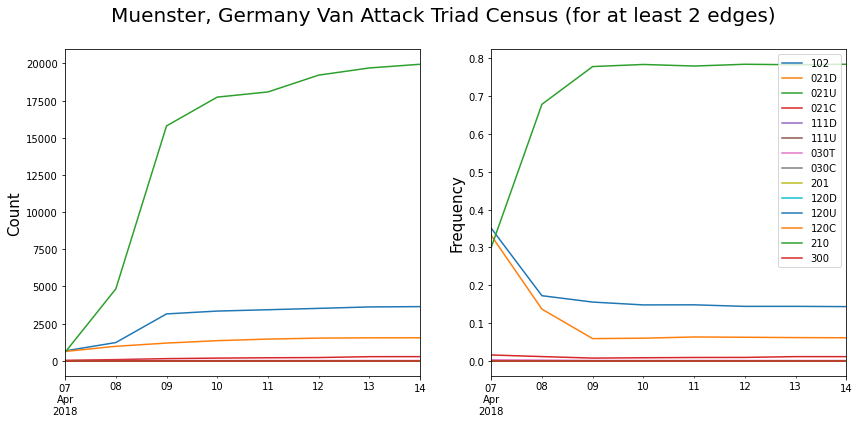

In [36]:
generate_triad_graph(van_attack_muenster_df, 'Muenster, Germany Van Attack Triad Census (for at least 2 edges)')

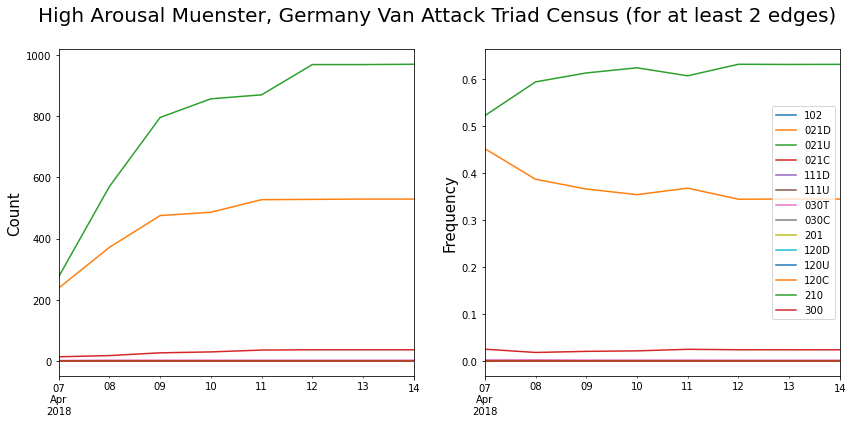

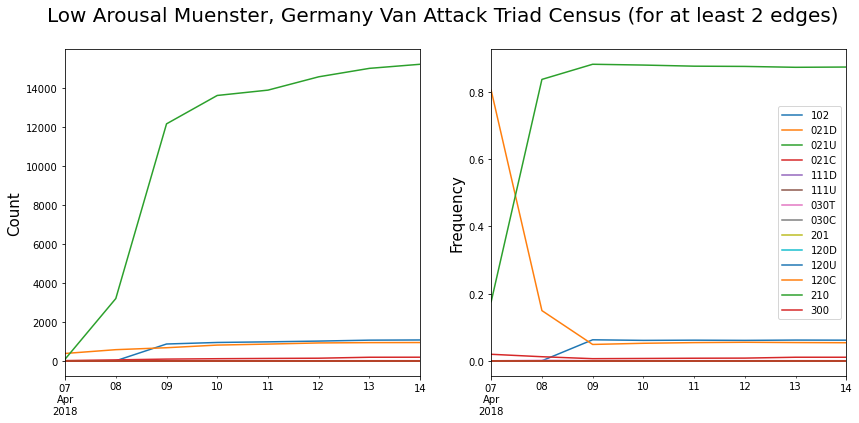

In [40]:
high_low_triads(van_attack_muenster_df, 'Muenster, Germany Van Attack Triad Census (for at least 2 edges)')

In [ ]:
#generate_triad_graph(school_shooting_santa_fe_df, 'Santa Fe, NM School Shooting Triad Census (for at least 2 edges)')

In [ ]:
#larger networks were run using SLURM